In [1]:
%matplotlib inline

In [2]:
# In KMeans we assume the variance cluster is equal leading to
# a subdivision of space that determines how the clusters are
# assigned. What about a situation where  the variances are not
# equal and each cluster point has some probabilistic association?

In [3]:
# Hard KMeans clustering is the same as applying a Gaussian
# Mixture Model with a covariance matrix which can be factored
# to the error times of the identity matrix.
# This leads to spherical clusters

In [4]:
import numpy as np

In [5]:
N = 1000
in_m = 72 # average mens height in inches
in_w = 66 # average womens height in inches

In [6]:
s_m = 2
s_w = s_m

In [7]:
m = np.random.normal(in_m, s_m, N)
w = np.random.normal(in_w, s_w, N)

In [8]:
from matplotlib import pyplot as plt

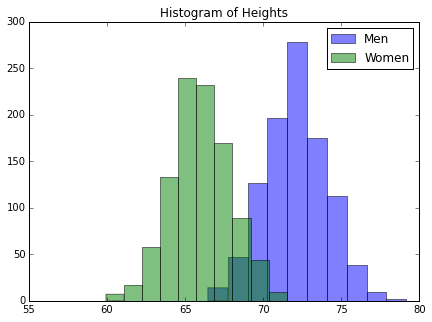

In [9]:
f, ax = plt.subplots(figsize=(7,5))
ax.set_title("Histogram of Heights")
ax.hist(m, alpha=.5, label='Men')
ax.hist(w, alpha=.5, label='Women')
ax.legend()

In [10]:
random_sample = np.random.choice([True, False], size=m.size)
m_test = m[random_sample]
m_train = m[~random_sample]

In [11]:
w_test = w[random_sample]
w_train = w[~random_sample]

In [12]:
from scipy import stats

In [13]:
m_pdf = stats.norm(m_train.mean(), m_train.std())
w_pdf = stats.norm(w_train.mean(), w_train.std())

In [14]:
# calculate based on the likelihood that the data point was
# generated from either distribution, and the most likely
# distribution will get the appropriate label assigned.

In [15]:
m_pdf.pdf(m[0])

0.20693407851938792

In [16]:
w_pdf.pdf(w[0])

0.13156319659262075

In [17]:
guesses_m = np.ones_like(m_test)
guesses_m[m_pdf.pdf(m_test) < w_pdf.pdf(w_test)] = 0

In [18]:
guesses_m.mean()

0.51483050847457623

In [19]:
guesses_w = np.ones_like(w_test)
guesses_w[m_pdf.pdf(w_test) > w_pdf.pdf(w_test)] = 0
guesses_w.mean()

0.94915254237288138

In [20]:
# allowing variance to differ between groups:

In [21]:
s_m = 1
s_w = 4

In [22]:
m = np.random.normal(in_m, s_m, N)
w = np.random.normal(in_w, s_w, N)

In [23]:
m_test = m[random_sample]
m_train = m[~random_sample]

In [24]:
w_test = w[random_sample]
w_train = w[~random_sample]

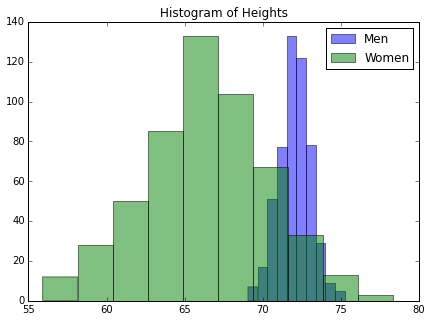

In [25]:
f, ax = plt.subplots(figsize=(7,5))
ax.set_title("Histogram of Heights")
ax.hist(m_train, alpha=.5, label='Men')
ax.hist(w_train, alpha=.5, label='Women')
ax.legend()